## Data loading and preprocessing 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prep_functions import *
import pycbc.types as pycbcty

/home/alberto_sinigaglia/anaconda3/envs/gaiia/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [2]:
root_dir = '/home/alberto_sinigaglia/gaia'
mass_range = 'CNN_high_mass'

Let's plot one example of the preprocessing made on the signal

In [3]:
paths = get_paths(mass_range, train=True, signal=True, root_dir='/home/alberto_sinigaglia/gaia')

data = load_data(paths[0])
data = pycbcty.timeseries.TimeSeries(data)

processed_data = process_data(data)
processed_data = pycbcty.timeseries.TimeSeries(processed_data, data.delta_t)

/home/alberto_sinigaglia/anaconda3/envs/gaiia/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


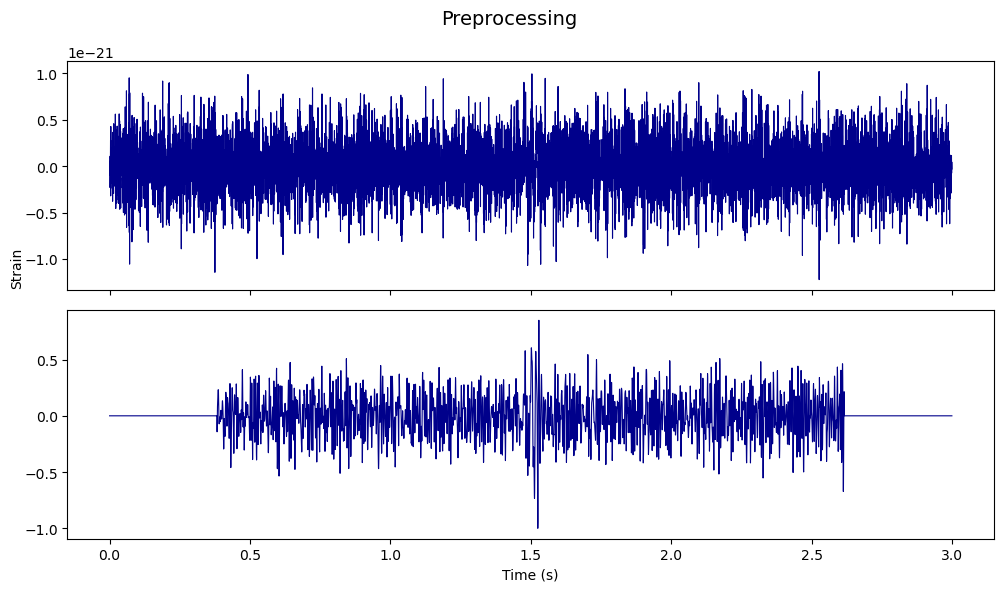

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

ax1.plot(data.sample_times, data, c='darkblue', linewidth=0.8)

ax2.plot(processed_data.sample_times, processed_data, c='darkblue', linewidth=0.8)
ax2.set_xlabel("Time (s)")

plt.suptitle('Preprocessing', fontsize=14)
fig.text(0.001, 0.55, 'Strain', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

Let's now load the whole dataset, and save in in a .npz file to load it whenever needed 

In [ ]:
X, y = load_dataset(mass_range, train=True, root_dir=root_dir)

np.savez_compressed(
    root_dir+'/{}_train.npz'.format(mass_range),
    X=X,
    y=y,
)

In [ ]:
X, y = load_dataset(mass_range, train=False, root_dir=root_dir)

np.savez_compressed(
    root_dir+'/{}_test.npz'.format(mass_range),
    X=X,
    y=y,
)

100%|██████████| 1296/1296 [13:23<00:00,  1.61it/s]
